# Aim : Implementing Support Vector Machine algorithm to solve classification problems.

In [ ]:
import  math,time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
start = time.time()

In [ ]:
df = pd.read_csv('/content/mnist_test.csv')
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1 = df.sample(500)

In [ ]:
df1.shape

(500, 785)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


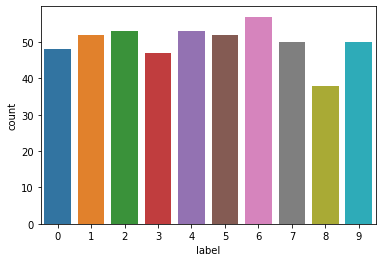

In [ ]:
import seaborn as sns
sns.countplot(df1.label)

In [ ]:
x = df1.iloc[:,1:]
y = df1.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train.shape,y_test.shape

((400, 784), (100,))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
steps = [('scaler', StandardScaler()),('SVM',SVC(kernel='poly'))]
pipeline = Pipeline(steps)

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'SVM__C': [0.001,0.1,100,10e5], 'SVM__gamma':[10,1,0.1,0.01]}
grid = GridSearchCV(pipeline, param_grid = parameters, cv=5)

In [ ]:
grid.fit(x_train,y_train)
print("score = %3.2f" %(grid.score(x_test,y_test)))
print("best parameters from train data: ", grid.best_params_)

score = 0.85
best parameters from train data:  {'SVM__C': 0.001, 'SVM__gamma': 10}


In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
y_pred

array([1, 4, 4, 5, 6, 0, 9, 0, 7, 1, 0, 1, 4, 1, 3, 3, 8, 5, 3, 4, 0, 6,
       5, 8, 6, 0, 1, 2, 8, 4, 3, 1, 2, 5, 6, 4, 5, 4, 3, 0, 8, 8, 5, 9,
       7, 1, 5, 1, 4, 6, 4, 9, 0, 6, 6, 6, 8, 6, 1, 6, 5, 6, 3, 8, 9, 1,
       7, 2, 9, 5, 1, 5, 9, 4, 8, 6, 4, 9, 4, 4, 3, 1, 4, 3, 5, 7, 7, 9,
       6, 7, 2, 6, 4, 5, 6, 4, 7, 1, 4, 3])

In [ ]:
print(y_pred[100:105])
print(y_test[100:105])

[]
Series([], Name: label, dtype: int64)


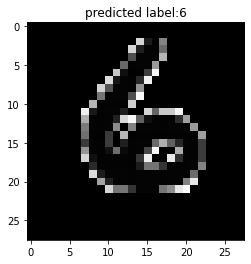

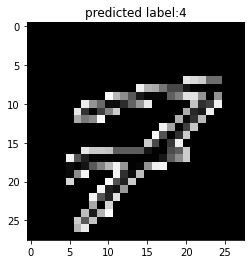

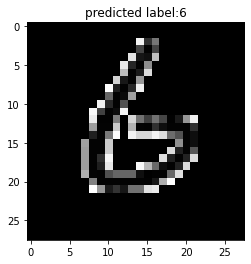

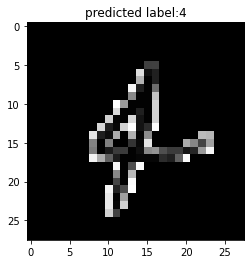

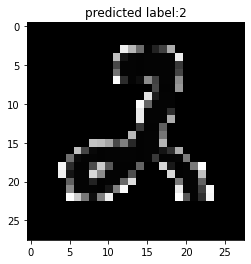

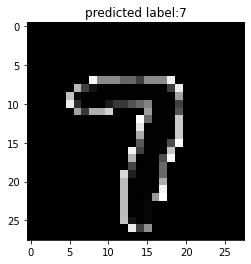

In [ ]:
#1st method
for i in (np.random.randint(0,99,6)):
  two_d = (np.reshape(x_test.values[i],(28,28))*255).astype(np.uint8)
  plt.title('predicted label:{0}'.format(y_pred[i]))
  plt.imshow(two_d,interpolation='nearest',cmap='gray')
  plt.show()
#2nd method
# for i in range(5):
#     xtest = np.array(xtest,dtype='float')
#     q = xtest[i]
#     p = q.reshape((28,28))
#     plt.title(f'Predicted {y_pred[i]}')
#     plt.imshow(p,cmap='gray')
#     plt.show()